<a href="https://colab.research.google.com/github/uyoung-jeong/2020_deep_learning_study/blob/master/03_perceptron_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
class Perceptron():
  def __init__(self, threshold=0.0, eta=0.01, max_iter=10):
    self.threshold = threshold
    self.eta = eta
    self.max_iter = max_iter

  # X: nxN array with no bias term (n: # data, N: # feature)
  def fit(self, X, Y):
    const = np.expand_dims(np.ones(X.shape[0]), axis=0)
    X = np.concatenate((X, const.T), axis=1)
    self.w = np.zeros(X.shape[1])

    self.hist = []
    for it in range(self.max_iter):
      error = np.zeros(X[0].shape)
      for x, y in zip(X,Y): # for every inputs
        out = self.predict(x)
        if y != out:
          dw = """ Implement here """
          self.w += dw # update
          error += np.abs(dw)
      print('iter: [{}/{}], error: {}'.format(it, self.max_iter, np.sum(error)))
      self.hist.append(np.sum(error))
      if np.sum(error) == 0: # nothing to learn
        print('earlystopping')
        break
    
  # X: nxN array with no bias term
  def predict(self, X):
    X_shape = X.shape
    if len(X_shape) < 2:
      X = np.expand_dims(X, axis=0)
    else:
      const = np.expand_dims(np.ones(X.shape[0]), axis=0)
      X = np.concatenate((X, const.T), axis=1)
    dot_ = """ Implement here """
    return np.where(""" Implement here """)

In [0]:
# input data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_AND = np.array([-1, -1, -1, 1]) # AND logic
Y_OR = np.array([-1, 1, 1, 1]) # OR logic
Y_XOR = np.array([-1, 1, 1, -1]) # OR logic
Y_dict = {'AND':Y_AND, 'OR':Y_OR, 'XOR':Y_XOR}
Y_keys = list(Y_dict.keys())

In [0]:
preds = []
hists = []
weights = []

for key in Y_keys:
  nn = Perceptron(eta=0.1)
  nn.fit(X,Y_dict[key])
  hists.append(nn.hist)
  weights.append(nn.w)

  pred = nn.predict(X)
  preds.append(pred)
  print('final prediction on {}: {}\n'.format(key, pred))

iter: [0/10], error: 0.30000000000000004
iter: [1/10], error: 0.6000000000000001
iter: [2/10], error: 0.7000000000000001
iter: [3/10], error: 0.5
iter: [4/10], error: 0.2
iter: [5/10], error: 0.0
earlystopping
final prediction on AND: [-1 -1 -1  1]

iter: [0/10], error: 0.2
iter: [1/10], error: 0.30000000000000004
iter: [2/10], error: 0.1
iter: [3/10], error: 0.0
earlystopping
final prediction on OR: [-1  1  1  1]

iter: [0/10], error: 0.5
iter: [1/10], error: 0.7000000000000001
iter: [2/10], error: 0.8
iter: [3/10], error: 0.8
iter: [4/10], error: 0.8
iter: [5/10], error: 0.8
iter: [6/10], error: 0.8
iter: [7/10], error: 0.8
iter: [8/10], error: 0.8
iter: [9/10], error: 0.8
final prediction on XOR: [ 1  1 -1 -1]



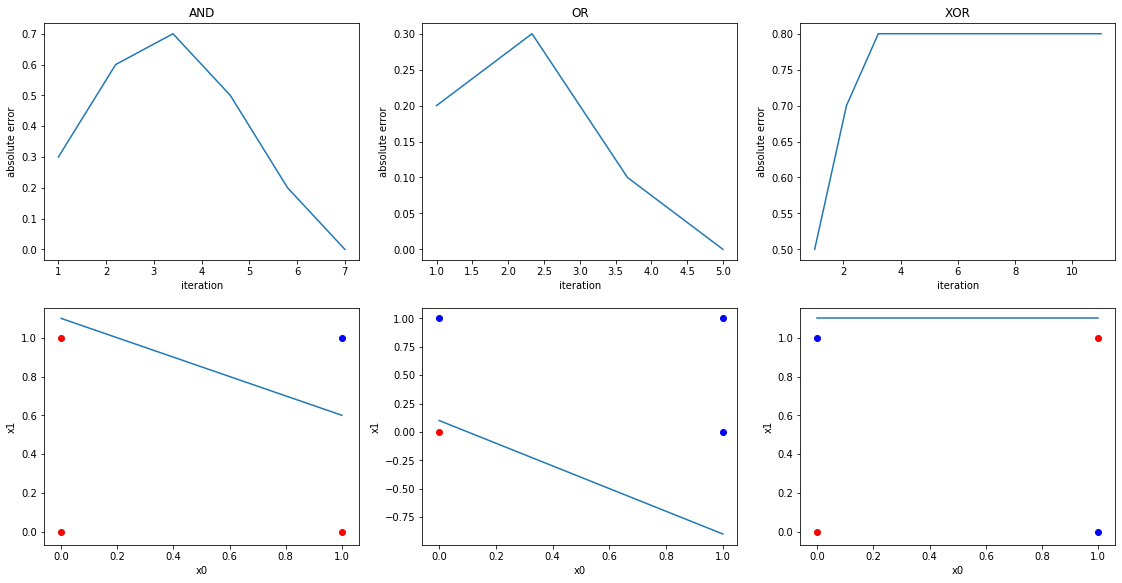

In [0]:
fig = plt.figure(figsize=[19.2, 9.6])
axes = []
for i, key in enumerate(Y_keys):
  ax = fig.add_subplot(2, 3, i+1)
  plot_x = np.linspace(1, 1+len(hists[i]), num=len(hists[i]))
  ax.plot(plot_x, hists[i])
  ax.set_title(key)
  ax.set_xlabel('iteration')
  ax.set_ylabel('absolute error')

  # decision boundary
  ax = fig.add_subplot(2, 3, 3+i+1)
  plot_y = (-1/weights[i][0]) * (weights[i][1] * X[:,0] + weights[i][2])+0.1
  if key == 'AND':
    ax.scatter(X[:3,0], X[:3,1], color='r')
    ax.scatter(X[3,0],X[3,1],color='b')
  if key == 'OR':
    ax.scatter(X[0,0], X[0,1], color='r')
    ax.scatter(X[1:,0],X[1:,1],color='b')
  if key == 'XOR':
    ax.scatter(X[0,0], X[0,1], color='r')
    ax.scatter(X[1:3,0],X[1:3,1],color='b')
    ax.scatter(X[3,0],X[3,1],color='r')
  ax.plot(X[:,0], plot_y)
  ax.set_xlabel('x0')
  ax.set_ylabel('x1')
plt.show()